In [64]:
import pandas as pd
import os
from pgtools.maf_parser import parse_maf, MAF
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

In [65]:
csv_dir = "/home/pampuch/studia/magisterka/final_summaries/scaffols_lens"
csv_name = "scaf_lens.csv"

In [66]:
for dataset in os.listdir(csv_dir):
    print(dataset)
    for f in os.listdir(os.path.join(csv_dir, dataset)):
        print(f)

sim_gr_1e-11_lr_1e-12_mu_1e-15_rep1_fragmented
scaf_lens.csv
sim_gr_1e-11_lr_1e-12_mu_1e-15_rep1_contaminated
scaf_lens.csv
klebsiella_subset
scaf_lens.csv
sim_gr_1e-11_lr_1e-12_mu_1e-15_rep1
scaf_lens.csv
basic_dataset_stats.csv


NotADirectoryError: [Errno 20] Not a directory: '/home/pampuch/studia/magisterka/final_summaries/scaffols_lens/basic_dataset_stats.csv'

In [67]:
all_lens = {}
for dataset in os.listdir(csv_dir):
    if "." in dataset:
        continue
    print(dataset)
    for f in os.listdir(os.path.join(csv_dir, dataset)):
        df = pd.read_csv(os.path.join(csv_dir, dataset, f))
        lens = df["Len"].to_numpy()
        all_lens[datasets_mapping(dataset)] = lens

sim_gr_1e-11_lr_1e-12_mu_1e-15_rep1_fragmented
sim_gr_1e-11_lr_1e-12_mu_1e-15_rep1_contaminated
klebsiella_subset
sim_gr_1e-11_lr_1e-12_mu_1e-15_rep1
GPSC_subset


In [68]:
def datasets_mapping(x):
    if x.startswith("sim"):
        x= x.replace("sim_gr_1e-11_lr_1e-12_mu_1e-15_rep1", "E. coli ")
    else:
        x= x.replace("_subset", "")
        x= x.replace("GPSC", "Pneumococcus")
        x = x.replace("klebsiella", "Klebsiella")
    return x.strip().replace("_","")

In [37]:
dataset = "klebsiella_subset"

In [ ]:
df = pd.read_csv(os.path.join(csv_dir, dataset, csv_name))

In [ ]:
df

In [ ]:
lens = df["Len"].to_numpy()

In [ ]:
lens

In [ ]:
max(lens)

In [38]:
from collections import Counter

In [ ]:
len_coutns = dict(Counter(lens))

In [ ]:
len_coutns

In [ ]:

sns.histplot(lens)


In [ ]:
datasets = sorted(list(all_lens.keys()))

In [ ]:
datasets

In [ ]:
all_lens

In [ ]:
lens = []
for i in all_lens.values():
    lens += list(i)
max(lens)

In [ ]:
datasets

In [39]:
datasets=['E. coli',
 'Pneumococcus',
 'E. coli fragmented',
 'Klebsiella',
 'E. coli contaminated',
]

IndexError: list index out of range

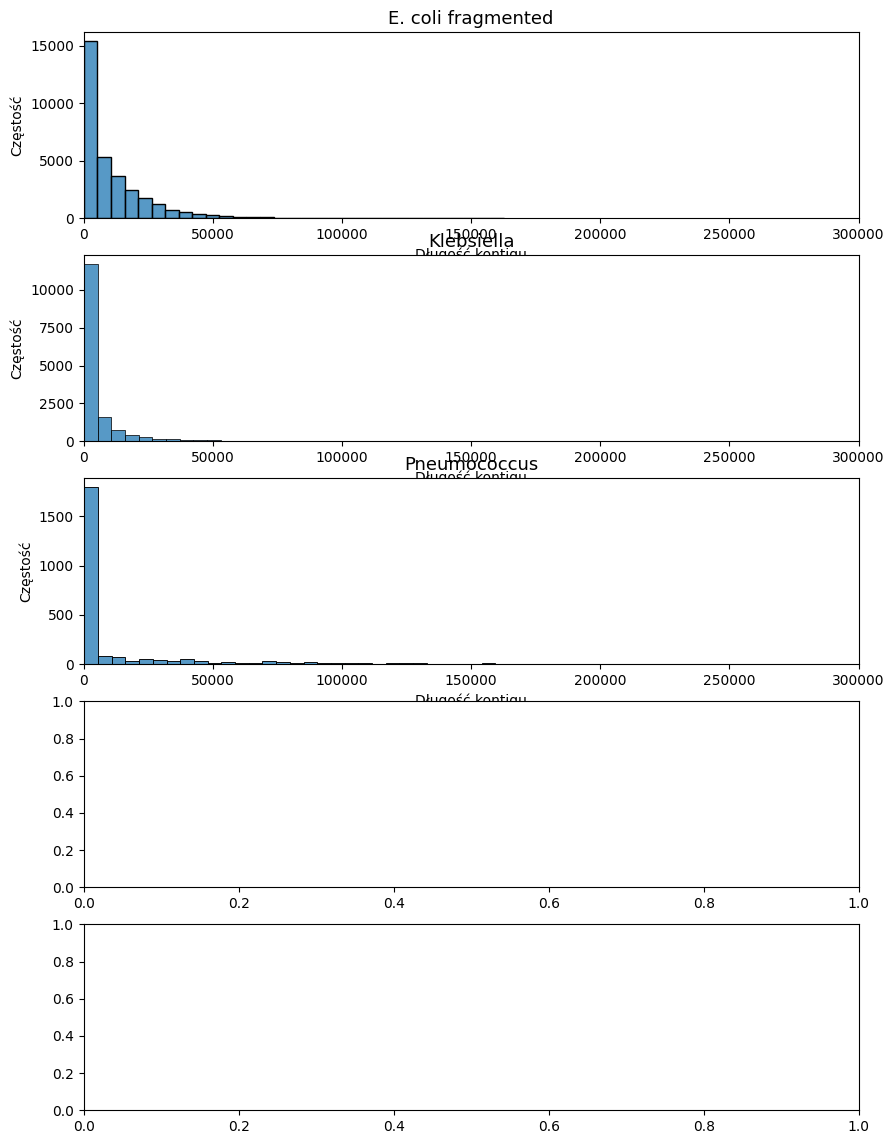

In [69]:
fig, axes = plt.subplots(5,figsize=(10, 14))
# fig.s
for k in range(5):
    dataset = datasets[k]
    i = k % 2
    j = k % 3
    sns.histplot(all_lens[dataset], ax=axes[k], bins=50, binwidth = 530000*0.01)
    axes[k].set_title(dataset, fontsize=13)
    axes[k].set_xlabel("Długość kontigu", fontsize=10)
    axes[k].set_ylabel("Częstość", fontsize=10)
    axes[k].set(xlim=(0,300000))
    # axes[j, i].set(ylim=(0,15500))

# plt.show()
fig.suptitle("Rozkłady długości kontigów w poszczególnych zbiorach danych", fontsize=16)
fig.tight_layout()

# axes[2, 1].axis("off")
plt.savefig(f"/home/pampuch/studia/magisterka/final_summaries/scaffols_lens/scaff_lens_dists.png")
plt.savefig(f"/home/pampuch/studia/magisterka/final_summaries/scaffols_lens/scaff_lens_dists.svg")

In [ ]:
round(9543, -2)

In [41]:
all_lens_rounded = {dataset: [round(i, -1) for i in lens] for dataset, lens in all_lens.items()}

In [42]:
for dataset, lens in all_lens_rounded.items():
    print(dataset)
    print(max(lens))
    print(min(lens))
    print(np.median(lens))
    print(np.mean(lens))

    print("-"*40)

E. coli fragmented
162700
80
5930.0
10762.353506541824
----------------------------------------
E. coli contaminated
254860
80
800.0
25389.565597031215
----------------------------------------
Klebsiella
520080
60
840.0
7520.442721681189
----------------------------------------
E. coli
255100
60
670.0
28143.58271865121
----------------------------------------
Pneumococcus
413790
290
480.0
18426.51284109149
----------------------------------------


In [43]:
print("Średnie długości contigów wchodzących w skład genomów poszczególnych datasetów:")
columns = ["Dataset", "Liczba wszystkich kontigów", ""]
for dataset in sorted(list(all_lens.keys())):
    lens = all_lens[dataset]
    print(f"{dataset}: liczba wszystkich scaffoldów: {len(lens)}, średnia długość {np.mean(lens):.0f}")
    # print(max(lens))
    # print(min(lens))
    # print(np.median(lens))
    # print(np.mean(lens))

    # print("-"*40)

Średnie długości contigów wchodzących w skład genomów poszczególnych datasetów:
E. coli: liczba wszystkich scaffoldów: 12337, średnia długość 28144
E. coli contaminated: liczba wszystkich scaffoldów: 13743, średnia długość 25389
E. coli fragmented: liczba wszystkich scaffoldów: 32254, średnia długość 10762
Klebsiella: liczba wszystkich scaffoldów: 15608, średnia długość 7520
Pneumococcus: liczba wszystkich scaffoldów: 2492, średnia długość 18427


In [44]:
dataset="klebsiella_subset"
df = pd.read_csv(os.path.join(csv_dir, dataset, csv_name))
df["Genome"] = df["Contig"].apply(lambda x: x.split(".")[0])

In [ ]:
df.groupby(by=["Genome"])["Len"].mean().mean().astype("int")

In [ ]:
df.groupby(by=["Genome"])["Len"].count().mean().astype("int")

In [70]:
cols = ["Dataset", "Średnia liczba kontigów w genomie", "Średnia średniej długości kontigu w genomie", "Średnia długość wszystkich kontigów w datasecie"]
data = []
for dataset in os.listdir(csv_dir):
    if "." in dataset:
        continue
    df = pd.read_csv(os.path.join(csv_dir, dataset, csv_name))
    df["Genome"] = df["Contig"].apply(lambda x: x.split(".")[0])
    data.append([datasets_mapping(dataset), df.groupby(by=["Genome"])["Len"].count().mean().astype("int"), df.groupby(by=["Genome"])["Len"].mean().mean().astype("int"), df["Len"].mean().astype("int")])

In [ ]:
data

In [ ]:
df_basic = pd.DataFrame(columns=cols, data=data)
df_basic = df_basic.sort_values(["Dataset"])

In [ ]:
df_basic

In [ ]:
df_basic.to_csv("/home/pampuch/studia/magisterka/final_summaries/scaffols_lens/basic_dataset_stats.csv", index=False)

### Contig (genomes?) coverage

In [46]:
cont_lens_dir = "/home/pampuch/studia/magisterka/final_summaries/scaf_cover/contig_lens_in_model/"
scaff_lens = "/home/pampuch/studia/magisterka/final_summaries/scaffols_lens"
cont_csv_name = "scaff_cont_lens.csv"
all_lens_csv = "scaf_lens.csv"

In [ ]:
dataset = "GPSC_subset"
model="cactus"

In [ ]:
df_cont_lens = pd.read_csv(os.path.join(cont_lens_dir, model, dataset, cont_csv_name))
df_lens = pd.read_csv(os.path.join(scaff_lens, dataset, "scaf_lens_without_velvet.csv"))

In [ ]:
df_cont_lens

In [ ]:
df_cont_lens = df_cont_lens[df_cont_lens["Contig"]]

In [ ]:
df_lens

In [ ]:
df_cov = df_lens.join(df_cont_lens.set_index("Contig"), on="Contig")

In [ ]:
df_cov

In [ ]:
df_cov["sum of seq lens in model"].sum() / df_cov["Len"].sum()

In [ ]:
df_cov["Len"].mean()

### Are incorporated contigs longer or shorter? Have more cds coverage or less?

In [ ]:
df_cov["Len"].dropna().mean()

In [ ]:
df_cov.dropna()["Len"].mean()

In [ ]:
df_lens.dropna()["Len"].mean()

In [ ]:
df_cov["sum of seq lens in model"].value_counts()

In [ ]:
df_cov[]

In [ ]:
df_cov.loc[df_cov.index[df_cov["sum of seq lens in model"].isna()], "sum of seq lens in model"] = 0
df_cov["Coverage"] = df_cov["sum of seq lens in model"] / df_cov["Len"]
df_cov["Coverage"] = df_cov["Coverage"].apply(lambda x: 1 if x > 1 else x)
df_cov["Genome"] = df_cov["Contig"].apply(lambda x: x.split(".")[0])
df_cov

In [ ]:
df_cov["Coverage"].

In [ ]:
df_cov_flt = df_cov[df_cov["Len"] > 100]
df_cov_flt

In [ ]:
df_genomes_cvg = df_cov.groupby("Genome")[["Len", "sum of seq lens in model"]].sum()

In [ ]:
df_genomes_cvg

In [ ]:
df_genomes_cvg["Coverage"] = df_genomes_cvg["sum of seq lens in model"] / df_genomes_cvg["Len"]
df_genomes_cvg["Coverage"] = df_genomes_cvg["Coverage"].apply(lambda x: 1 if x > 1 else x)

In [ ]:
df_genomes_cvg

In [ ]:
df_cov["Len rounded"] = df_cov["Len"].round(-2)

In [ ]:
df_cov

In [ ]:
df_cov["Len rounded"] = df_cov["Len"].round(-2)
df_genomes_cvg["Mean scaff len"] = df_cov.groupby(["Genome"])[["Len"]].mean().round().astype("int")
df_genomes_cvg["Max scaff len"] = df_cov.groupby(["Genome"])[["Len"]].max().round()
df_genomes_cvg["Median scaff len"] = df_cov.groupby(["Genome"])[["Len"]].median().round()
df_genomes_cvg["No. of scaffs"] = df_cov.groupby(["Genome"])[["Len"]].count().round()

# df_genomes_cvg["Median scaff len category"] = df_cov["Len rounded"].mode().round()
df_genomes_cvg = df_genomes_cvg.sort_values("Coverage", ascending=False)

In [ ]:
df_cov.groupby("Genome")[["Len rounded"]].agg(pd.Series.mode)

In [ ]:
df_genomes_cvg

In [ ]:
df_genomes_cvg.index

In [ ]:
genomes = df_cov["Genome"].unique()

In [47]:
for genome in df_genomes_cvg.index:
    df = df_cov[df_cov["Genome"] == genome]
    print(genome)
    print("genome cvg: " + str(df_genomes_cvg.at[genome,"Coverage"]))
    print(df["Len rounded"].value_counts().head(n=7))

NameError: name 'df_genomes_cvg' is not defined

In [ ]:
df_genomes_cvg

In [ ]:
df_cov["Len"].round(-4)

In [ ]:
df_genomes_cvg.to_csv("genome_cvg.csv")
df_cov_flt.to_csv("scaff_cvg.csv")

In [71]:
summaries_dir = "/home/pampuch/studia/magisterka/final_summaries/"

cont_lens_dir = "/home/pampuch/studia/magisterka/final_summaries/scaf_cover/contig_lens_in_model/"
scaff_lens = "/home/pampuch/studia/magisterka/final_summaries/scaffols_lens"
cont_csv_name = "scaff_cont_lens.csv"
all_lens_csv = "scaf_lens.csv"

summaries_dir = "/home/pampuch/studia/magisterka/final_summaries/scaf_cover/csv_summaries"
scaff_res_csv = "scaff_cov_summary.csv"
genomes_res_csv = "genomes_cov_summary.csv"

def summarise_dataset_coverages(dataset):
    for model in os.listdir(cont_lens_dir):
        print(model)
        df_cont_lens = pd.read_csv(os.path.join(cont_lens_dir, model, dataset, cont_csv_name))

            
        df_lens = pd.read_csv(os.path.join(scaff_lens, dataset, all_lens_csv))
        
        if dataset == "GPSC_subset":       
            df_lens = pd.read_csv(os.path.join(scaff_lens, dataset, "scaf_lens_without_velvet.csv"))
        print(df_lens.head())
        print(df_cont_lens.head())
        df_cov = df_lens.join(df_cont_lens.set_index("Contig"), on="Contig")
        df_cov.loc[df_cov.index[df_cov["sum of seq lens in model"].isna()], "sum of seq lens in model"] = 0
        df_cov["Coverage"] = df_cov["sum of seq lens in model"] / df_cov["Len"]
        df_cov["Coverage"] = df_cov["Coverage"].apply(lambda x: 1 if x > 1 else x)
        df_cov["Genome"] = df_cov["Contig"].apply(lambda x: x.split(".")[0])
        
        df_genomes_cvg = df_cov.groupby("Genome")[["Len", "sum of seq lens in model"]].sum()
        df_genomes_cvg["Coverage"] = df_genomes_cvg["sum of seq lens in model"] / df_genomes_cvg["Len"]
        df_genomes_cvg["Coverage"] = df_genomes_cvg["Coverage"].apply(lambda x: 1 if x > 1 else x)

        df_cov["Len rounded"] = df_cov["Len"].round(-2)
        df_genomes_cvg["Mean scaff len"] = df_cov.groupby(["Genome"])[["Len"]].mean().round().astype("int")
        df_genomes_cvg["Max scaff len"] = df_cov.groupby(["Genome"])[["Len"]].max().round()
        df_genomes_cvg["Median scaff len"] = df_cov.groupby(["Genome"])[["Len"]].median().round()
        df_genomes_cvg["No. of scaffs"] = df_cov.groupby(["Genome"])[["Len"]].count().round()
        
        # df_genomes_cvg["Median scaff len category"] = df_cov["Len rounded"].mode().round()
        df_genomes_cvg = df_genomes_cvg.sort_values("Coverage", ascending=False)
        print(df_genomes_cvg["Coverage"].head())
        df_cov.to_csv(os.path.join(summaries_dir, model, dataset, scaff_res_csv), index=False)
        df_genomes_cvg.to_csv(os.path.join(summaries_dir, model, dataset, genomes_res_csv), index=False)
summarise_dataset_coverages("GPSC_subset")

panaroo
                                 Contig     Len
0  17870_7_11.ERS725493_SC_contig000001  393383
1  17870_7_11.ERS725493_SC_contig000002  313001
2  17870_7_11.ERS725493_SC_contig000003  200830
3  17870_7_11.ERS725493_SC_contig000004  178059
4  17870_7_11.ERS725493_SC_contig000005  158966
                                   Contig  sum of seq lens in model
0   18090_1_123.ERS740691_SC_contig000023                     35565
1   19084_7_49.ERS1021351_SC_contig000020                     36063
2    19341_2_35.ERS813179_SC_contig000004                    233073
3  21053_8_138.ERS1299630_SC_contig000004                    121077
4            22027_1_155._SC_contig000010                     90062
Genome
17870_7_77     0.853710
23164_8_98     0.853587
23164_8_137    0.853414
19084_7_49     0.853301
22841_3_20     0.852281
Name: Coverage, dtype: float64
panaroo_compl
                                 Contig     Len
0  17870_7_11.ERS725493_SC_contig000001  393383
1  17870_7_11.ERS725493_SC_c

In [ ]:
summarise_dataset_coverages("GPSC_subset")

In [75]:
all_datasets = []
for dataset in os.listdir(scaff_lens):
    # print(dataset)
    if "." not in dataset:
        print(dataset)
        all_datasets.append(dataset)

sim_gr_1e-11_lr_1e-12_mu_1e-15_rep1_fragmented
sim_gr_1e-11_lr_1e-12_mu_1e-15_rep1_contaminated
klebsiella_subset
sim_gr_1e-11_lr_1e-12_mu_1e-15_rep1
GPSC_subset


In [49]:
tiny_datasets = ["klebsiella_subset", "GPSC_subset", "sim_gr_1e-11_lr_1e-12_mu_1e-15_rep1_fragmented"]

In [50]:
for dataset in tiny_datasets:
    if "." not in dataset:
        summarise_dataset_coverages(dataset)

panaroo
                  Contig    Len
0  5235_5_12.contig00001  64326
1  5235_5_12.contig00002  60612
2  5235_5_12.contig00003  53131
3  5235_5_12.contig00004  42928
4  5235_5_12.contig00005  40521
                 Contig  sum of seq lens in model
0  5150_2_2.contig00017                    136924
1  5150_3_5.contig00031                     62049
2  5151_2_6.contig00001                    278508
3  5151_6_6.contig00001                    349451
4  5193_1_5.contig00005                    165125
Genome
5151_6_6    0.869304
5193_1_5    0.850649
5193_2_6    0.846540
5299_1_3    0.845519
5197_2_1    0.844902
Name: Coverage, dtype: float64
panaroo_compl
                  Contig    Len
0  5235_5_12.contig00001  64326
1  5235_5_12.contig00002  60612
2  5235_5_12.contig00003  53131
3  5235_5_12.contig00004  42928
4  5235_5_12.contig00005  40521
                  Contig  sum of seq lens in model
0   5235_1_4.contig00066                     13287
1   5235_2_1.contig00117                     1292

In [51]:
for dataset in tiny_datasets:
    if "." in dataset:
        continue
    print(dataset)
    for model in os.listdir(cont_lens_dir):
        if "." in model:
            continue
        print(model)
        for f in os.listdir(os.path.join(summaries_dir, model, dataset)):

            f_path = os.path.join(summaries_dir, model, dataset, f)
            df = pd.read_csv(f_path)
            print(dataset)
            print(df["Coverage"].mean())

klebsiella_subset
panaroo
klebsiella_subset
0.34816185380925
klebsiella_subset
0.8096162001302671
panaroo_compl
klebsiella_subset
0.3708078228845535
klebsiella_subset
0.8845886698301506
cactus
klebsiella_subset
0.2667236758937576
klebsiella_subset
0.21471684562243626
progressive
klebsiella_subset
0.4364335370259947
klebsiella_subset
0.8349404403275893
GPSC_subset
panaroo
GPSC_subset
0.2715249094153349
GPSC_subset
0.8341344707076745
panaroo_compl
GPSC_subset
0.30640869337208687
GPSC_subset
0.9858547387075813
cactus
GPSC_subset
0.31343711250377515
GPSC_subset
0.3565252311069585
progressive
GPSC_subset
0.30196217433143546
GPSC_subset
0.8506275105425086
sim_gr_1e-11_lr_1e-12_mu_1e-15_rep1_fragmented
panaroo
sim_gr_1e-11_lr_1e-12_mu_1e-15_rep1_fragmented
0.58336155325194
sim_gr_1e-11_lr_1e-12_mu_1e-15_rep1_fragmented
0.8148374056631005
panaroo_compl
sim_gr_1e-11_lr_1e-12_mu_1e-15_rep1_fragmented
0.6380873220486515
sim_gr_1e-11_lr_1e-12_mu_1e-15_rep1_fragmented
0.9004370870738443
cactus
sim_

In [ ]:
# def summarise_dataset_coverages(dataset):
#     for model in os.listdir(cont_lens_dir):
#         print(model)
#         df_cont_lens = pd.read_csv(os.path.join(cont_lens_dir, model, dataset, cont_csv_name))

            
#         df_lens = pd.read_csv(os.path.join(scaff_lens, dataset, all_lens_csv))
#         df_cov = df_lens.join(df_cont_lens.set_index("Contig"), on="Contig")
#         if dataset == "GPSC_subset" and model != "panaroo":       
#             df_lens = pd.read_csv(os.path.join(scaff_lens, dataset, "scaf_lens_without_velvet.csv"))
#         print(df_lens.head())
#         print(df_cont_lens.head())
#         df_cov.loc[df_cov.index[df_cov["sum of seq lens in model"].isna()], "sum of seq lens in model"] = 0
#         df_cov["Coverage"] = df_cov["sum of seq lens in model"] / df_cov["Len"]
#         df_cov["Coverage"] = df_cov["Coverage"].apply(lambda x: 1 if x > 1 else x)
#         df_cov["Genome"] = df_cov["Contig"].apply(lambda x: x.split(".")[0])
        
#         df_genomes_cvg = df_cov.groupby("Genome")[["Len", "sum of seq lens in model"]].sum()
#         df_genomes_cvg["Coverage"] = df_genomes_cvg["sum of seq lens in model"] / df_genomes_cvg["Len"]
#         df_genomes_cvg["Coverage"] = df_genomes_cvg["Coverage"].apply(lambda x: 1 if x > 1 else x)

#         df_cov["Len rounded"] = df_cov["Len"].round(-2)
#         df_genomes_cvg["Mean scaff len"] = df_cov.groupby(["Genome"])[["Len"]].mean().round().astype("int")
#         df_genomes_cvg["Max scaff len"] = df_cov.groupby(["Genome"])[["Len"]].max().round()
#         df_genomes_cvg["Median scaff len"] = df_cov.groupby(["Genome"])[["Len"]].median().round()
#         df_genomes_cvg["No. of scaffs"] = df_cov.groupby(["Genome"])[["Len"]].count().round()
        
#         # df_genomes_cvg["Median scaff len category"] = df_cov["Len rounded"].mode().round()
#         df_genomes_cvg = df_genomes_cvg.sort_values("Coverage", ascending=False)
#         print(df_genomes_cvg.head())
#         df_cov.to_csv(os.path.join(summaries_dir, model, dataset, scaff_res_csv), index=False)
#         df_genomes_cvg.to_csv(os.path.join(summaries_dir, model, dataset, genomes_res_csv), index=False)

#     return df_genomes_cvg, df_cov

# df_genomes, df_cov = summarise_dataset_coverages("GPSC_subset")

In [ ]:
df_genomes

In [ ]:
df_cov

In [ ]:
dataset = "GPSC_subset"

### Histogramy pokrycia

Dla każdego datasetu po 3 (panaroo, cactus, panaroo uzupełnione)

In [83]:
cvg_dict = {}
for dataset in tiny_datasets:
    
    if "." in dataset:
        continue
    print(dataset)
    dataset_name = datasets_mapping(dataset)
    cvg_dict[dataset_name] = {}
    for model in os.listdir(cont_lens_dir):
        if "." in model:
            continue
        print(model)
        
        for f in os.listdir(os.path.join(summaries_dir, model, dataset)):
            if not f.startswith("genome"):
                continue
            f_path = os.path.join(summaries_dir, model, dataset, f)
            df = pd.read_csv(f_path)
            print(dataset)
            print(df["Coverage"].mean())
            cvg_dict[dataset_name][model] = df["Coverage"].to_numpy()



klebsiella_subset
panaroo
klebsiella_subset
0.8096162001302671
panaroo_compl
klebsiella_subset
0.8845886698301506
cactus
klebsiella_subset
0.21471684562243626
progressive
klebsiella_subset
0.8349404403275893
GPSC_subset
panaroo
GPSC_subset
0.8341344707076745
panaroo_compl
GPSC_subset
0.9858547387075813
cactus
GPSC_subset
0.3565252311069585
progressive
GPSC_subset
0.8506275105425086
sim_gr_1e-11_lr_1e-12_mu_1e-15_rep1_fragmented
panaroo
sim_gr_1e-11_lr_1e-12_mu_1e-15_rep1_fragmented
0.8148374056631005
panaroo_compl
sim_gr_1e-11_lr_1e-12_mu_1e-15_rep1_fragmented
0.9004370870738443
cactus
sim_gr_1e-11_lr_1e-12_mu_1e-15_rep1_fragmented
0.4143351453336534
progressive
sim_gr_1e-11_lr_1e-12_mu_1e-15_rep1_fragmented
0.9653241809418924


In [99]:
all_cvg_dict = {}
for dataset in all_datasets:
    
    if "." in dataset:
        continue
    print(dataset)
    dataset_name = datasets_mapping(dataset)
    all_cvg_dict[dataset_name] = {}
    for model in os.listdir(cont_lens_dir):
        if "." in model:
            continue
        if data not in tiny_datasets and model=="progressive":
            continue
        print(model)
        
        for f in os.listdir(os.path.join(summaries_dir, model, dataset)):
            if not f.startswith("genome"):
                continue
            f_path = os.path.join(summaries_dir, model, dataset, f)
            df = pd.read_csv(f_path)
            print(dataset)
            print(df["Coverage"].mean())
            all_cvg_dict[dataset_name][model] = df["Coverage"].to_numpy()



sim_gr_1e-11_lr_1e-12_mu_1e-15_rep1_fragmented
panaroo
sim_gr_1e-11_lr_1e-12_mu_1e-15_rep1_fragmented
0.8148374056631005
panaroo_compl
sim_gr_1e-11_lr_1e-12_mu_1e-15_rep1_fragmented
0.9004370870738443
cactus
sim_gr_1e-11_lr_1e-12_mu_1e-15_rep1_fragmented
0.4143351453336534
sim_gr_1e-11_lr_1e-12_mu_1e-15_rep1_contaminated
panaroo
sim_gr_1e-11_lr_1e-12_mu_1e-15_rep1_contaminated
0.835589201887763
panaroo_compl
sim_gr_1e-11_lr_1e-12_mu_1e-15_rep1_contaminated
0.9258328139298654
cactus
sim_gr_1e-11_lr_1e-12_mu_1e-15_rep1_contaminated
0.918336531375397
klebsiella_subset
panaroo
klebsiella_subset
0.8096162001302671
panaroo_compl
klebsiella_subset
0.8845886698301506
cactus
klebsiella_subset
0.21471684562243626
sim_gr_1e-11_lr_1e-12_mu_1e-15_rep1
panaroo
sim_gr_1e-11_lr_1e-12_mu_1e-15_rep1
0.8399943115283734
panaroo_compl
sim_gr_1e-11_lr_1e-12_mu_1e-15_rep1
0.9317783176195775
cactus
sim_gr_1e-11_lr_1e-12_mu_1e-15_rep1
0.933561279595239
GPSC_subset
panaroo
GPSC_subset
0.8341344707076745
panaroo

In [ ]:
cvg_dict

In [53]:
datasets = []
model_names = set()
for dataset, models in cvg_dict.items():
    datasets.append(dataset)
    for model, cvg in models.items():
        model_names.add(model)
datasets = sorted(datasets)        

In [ ]:
datasets

In [ ]:
model_names

In [54]:
model_names = ["panaroo","panaroo_compl","cactus", "progressive"]


In [ ]:
dataset = "Klebsiella"

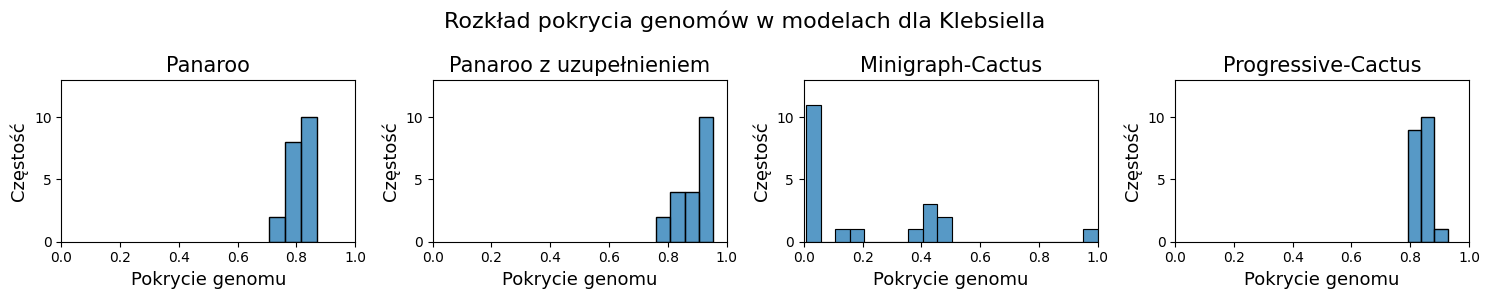

In [88]:
dataset = "Klebsiella"
model_name_mapping = {"panaroo" : "Panaroo","panaroo_compl" : "Panaroo z uzupełnieniem","cactus": "Minigraph-Cactus", "progressive":"Progressive-Cactus"}
hists_dir = "/home/pampuch/studia/magisterka/final_summaries/scaf_cover/hists/"
fig, axes = plt.subplots(1,4,figsize=(15, 3))
# fig.s
for k in range(4):
    model = model_names[k]
    i = k % 2
    j = k % 3
    # sns.histplot(cvg_dict[dataset][model], ax=axes[k], bins=50, binwidth = 530000*0.01)
    # print(len(cvg_dict[dataset][model]))
    # print()
    sns.histplot(cvg_dict[dataset][model], ax=axes[k], binwidth=0.05*1)
    axes[k].set_title(model_name_mapping[model], fontsize=15)
    axes[k].set_xlabel("Pokrycie genomu", fontsize=13)
    axes[k].set_ylabel("Częstość", fontsize=13)
    axes[k].set(xlim=(0,1))
    axes[k].set(ylim=(0,13))
fig.suptitle(f"Rozkład pokrycia genomów w modelach dla {dataset}", fontsize=16)

# plt.show()
fig.tight_layout()

# axes[2, 1].axis("off")
dataset_name = dataset.replace(" ","_")
plt.savefig(f"{hists_dir}/{dataset_name}_genomes_csv.png")
plt.savefig(f"{hists_dir}/{dataset_name}_genomes_csv.svg")

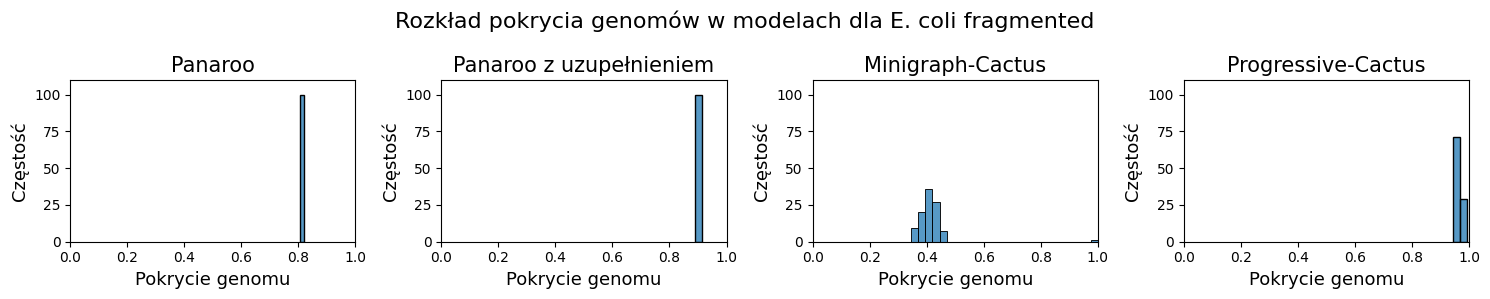

In [115]:
dataset = "E. coli fragmented"
model_name_mapping = {"panaroo" : "Panaroo","panaroo_compl" : "Panaroo z uzupełnieniem","cactus": "Minigraph-Cactus", "progressive":"Progressive-Cactus"}
hists_dir = "/home/pampuch/studia/magisterka/final_summaries/scaf_cover/hists/"
fig, axes = plt.subplots(1,4,figsize=(15, 3))
# fig.s
for k in range(4):
    model = model_names[k]
    i = k % 2
    j = k % 3
    # sns.histplot(cvg_dict[dataset][model], ax=axes[k], bins=50, binwidth = 530000*0.01)
    # print(len(cvg_dict[dataset][model]))
    # print()
    sns.histplot(cvg_dict[dataset][model], ax=axes[k], binwidth=0.025)
    axes[k].set_title(model_name_mapping[model], fontsize=15)
    axes[k].set_xlabel("Pokrycie genomu", fontsize=13)
    axes[k].set_ylabel("Częstość", fontsize=13)
    axes[k].set(xlim=(0,1))
    axes[k].set(ylim=(0,110))
fig.suptitle(f"Rozkład pokrycia genomów w modelach dla {dataset}", fontsize=16)

# plt.show()
fig.tight_layout()

# axes[2, 1].axis("off")
dataset_name = dataset.replace(" ","_")
plt.savefig(f"{hists_dir}/{dataset_name}_genomes_csv.png")
plt.savefig(f"{hists_dir}/{dataset_name}_genomes_csv.svg")

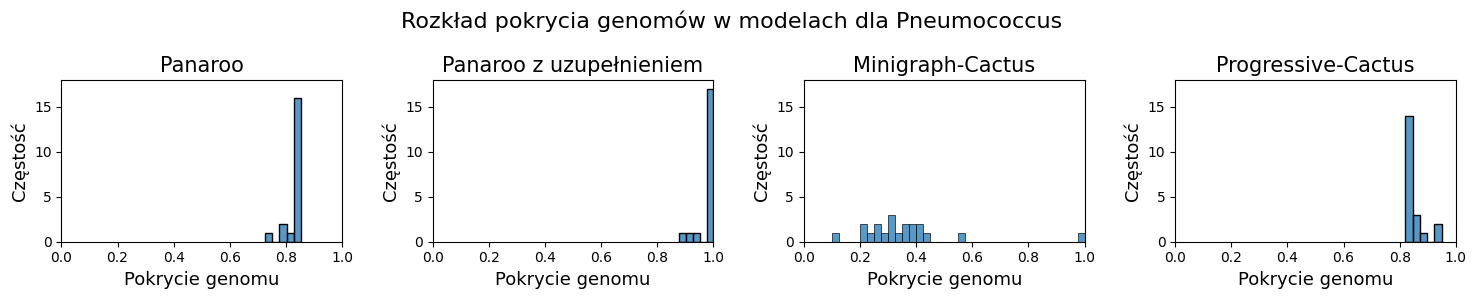

In [97]:
dataset = "Pneumococcus"
model_name_mapping = {"panaroo" : "Panaroo","panaroo_compl" : "Panaroo z uzupełnieniem","cactus": "Minigraph-Cactus", "progressive":"Progressive-Cactus"}
hists_dir = "/home/pampuch/studia/magisterka/final_summaries/scaf_cover/hists/"
fig, axes = plt.subplots(1,4,figsize=(15, 3))
# fig.s
for k in range(4):
    model = model_names[k]
    i = k % 2
    j = k % 3
    # sns.histplot(cvg_dict[dataset][model], ax=axes[k], bins=50, binwidth = 530000*0.01)
    # print(len(cvg_dict[dataset][model]))
    # print()
    sns.histplot(cvg_dict[dataset][model], ax=axes[k], binwidth=0.025)
    axes[k].set_title(model_name_mapping[model], fontsize=15)
    axes[k].set_xlabel("Pokrycie genomu", fontsize=13)
    axes[k].set_ylabel("Częstość", fontsize=13)
    axes[k].set(xlim=(0,1))
    axes[k].set(ylim=(0,18))
fig.suptitle(f"Rozkład pokrycia genomów w modelach dla {dataset}", fontsize=16)

# plt.show()
fig.tight_layout()

# axes[2, 1].axis("off")
dataset_name = dataset.replace(" ","_")
plt.savefig(f"{hists_dir}/{dataset_name}_genomes_csv.png")
plt.savefig(f"{hists_dir}/{dataset_name}_genomes_csv.svg")

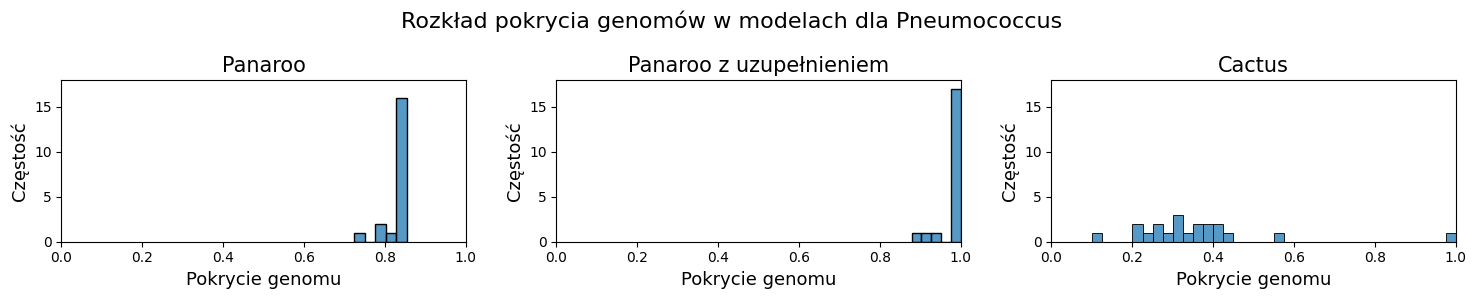

In [96]:
# dataset = "Pneumococcus"
# model_name_mapping = {"panaroo" : "Panaroo","panaroo_compl" : "Panaroo z uzupełnieniem","cactus": "Cactus"}
# hists_dir = "/home/pampuch/studia/magisterka/final_summaries/scaf_cover/hists/"
# fig, axes = plt.subplots(1,3,figsize=(15, 3))
# # fig.s
# for k in range(3):
#     model = model_names[k]
#     i = k % 2
#     j = k % 3
#     # sns.histplot(cvg_dict[dataset][model], ax=axes[k], bins=50, binwidth = 530000*0.01)
#     # print(len(cvg_dict[dataset][model]))
#     # print()
#     sns.histplot(cvg_dict[dataset][model], ax=axes[k], binwidth=0.025)
#     axes[k].set_title(model_name_mapping[model], fontsize=15)
#     axes[k].set_xlabel("Pokrycie genomu", fontsize=13)
#     axes[k].set_ylabel("Częstość", fontsize=13)
#     axes[k].set(xlim=(0,1))
#     axes[k].set(ylim=(0,18))
# fig.suptitle(f"Rozkład pokrycia genomów w modelach dla {dataset}", fontsize=16)

# # plt.show()
# fig.tight_layout()

# # axes[2, 1].axis("off")
# dataset_name = dataset.replace(" ","_")
# plt.savefig(f"{hists_dir}/{dataset_name}_genomes_csv.png")
# plt.savefig(f"{hists_dir}/{dataset_name}_genomes_csv.svg")

panaroo
panaroo_compl
cactus


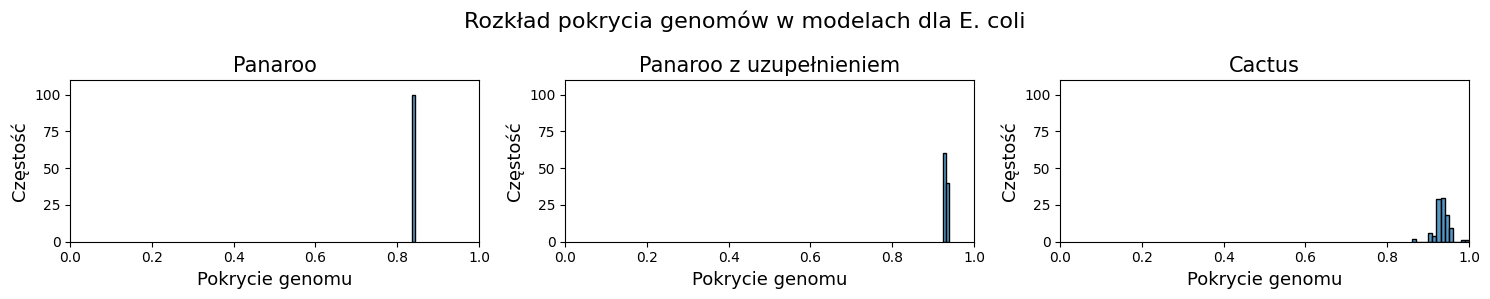

In [112]:
dataset = "E. coli"
model_name_mapping = {"panaroo" : "Panaroo","panaroo_compl" : "Panaroo z uzupełnieniem","cactus": "Cactus"}
hists_dir = "/home/pampuch/studia/magisterka/final_summaries/scaf_cover/hists/"
fig, axes = plt.subplots(1,3,figsize=(15, 3))
# fig.s
for k in range(3):
    model = model_names[k]
    print(model)
    i = k % 2
    j = k % 3
    # sns.histplot(cvg_dict[dataset][model], ax=axes[k], bins=50, binwidth = 530000*0.01)
    # print(len(cvg_dict[dataset][model]))
    # print(cvg_dict[dataset][model])
    sns.histplot(all_cvg_dict[dataset][model], ax=axes[k], binwidth=0.01)
    axes[k].set_title(model_name_mapping[model], fontsize=15)
    axes[k].set_xlabel("Pokrycie genomu", fontsize=13)
    axes[k].set_ylabel("Częstość", fontsize=13)
    axes[k].set(xlim=(0,1))
    axes[k].set(ylim=(0,110))
fig.suptitle(f"Rozkład pokrycia genomów w modelach dla {dataset}", fontsize=16)

# plt.show()
fig.tight_layout()

# axes[2, 1].axis("off")
dataset_name = dataset.replace(" ","_")
plt.savefig(f"{hists_dir}/{dataset_name}_genomes_csv.png")
plt.savefig(f"{hists_dir}/{dataset_name}_genomes_csv.svg")

panaroo
panaroo_compl
cactus


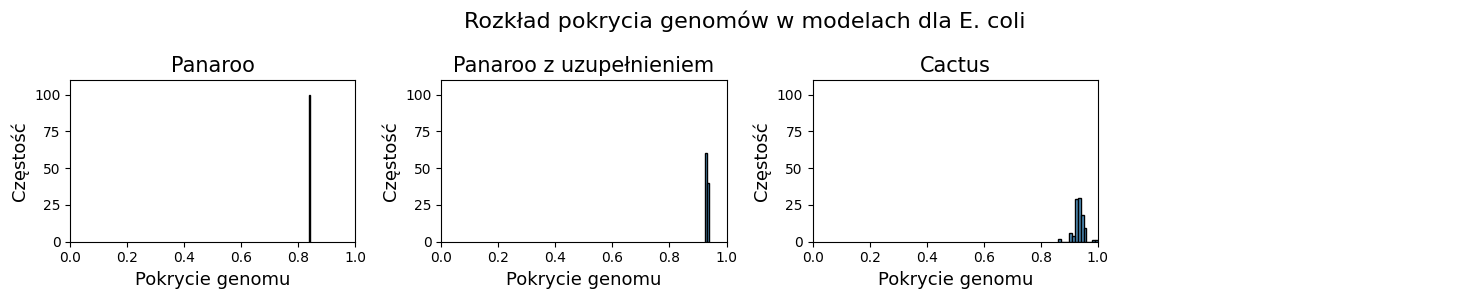

In [127]:
dataset = "E. coli"
model_name_mapping = {"panaroo" : "Panaroo","panaroo_compl" : "Panaroo z uzupełnieniem","cactus": "Cactus"}
hists_dir = "/home/pampuch/studia/magisterka/final_summaries/scaf_cover/hists/"
fig, axes = plt.subplots(1,4,figsize=(15, 3))
# fig.s
for k in range(3):
    model = model_names[k]
    print(model)
    i = k % 2
    j = k % 3
    # sns.histplot(cvg_dict[dataset][model], ax=axes[k], bins=50, binwidth = 530000*0.01)
    # print(len(cvg_dict[dataset][model]))
    # print(cvg_dict[dataset][model])
    sns.histplot(all_cvg_dict[dataset][model], ax=axes[k], binwidth=0.01)
    axes[k].set_title(model_name_mapping[model], fontsize=15)
    axes[k].set_xlabel("Pokrycie genomu", fontsize=13)
    axes[k].set_ylabel("Częstość", fontsize=13)
    axes[k].set(xlim=(0,1))
    axes[k].set(ylim=(0,110))
fig.suptitle(f"Rozkład pokrycia genomów w modelach dla {dataset}", fontsize=16)

# plt.show()
fig.tight_layout()

axes[3].axis("off")
dataset_name = dataset.replace(" ","_")
plt.savefig(f"{hists_dir}/{dataset_name}_genomes_csv.png")
plt.savefig(f"{hists_dir}/{dataset_name}_genomes_csv.svg")

panaroo
panaroo_compl
cactus


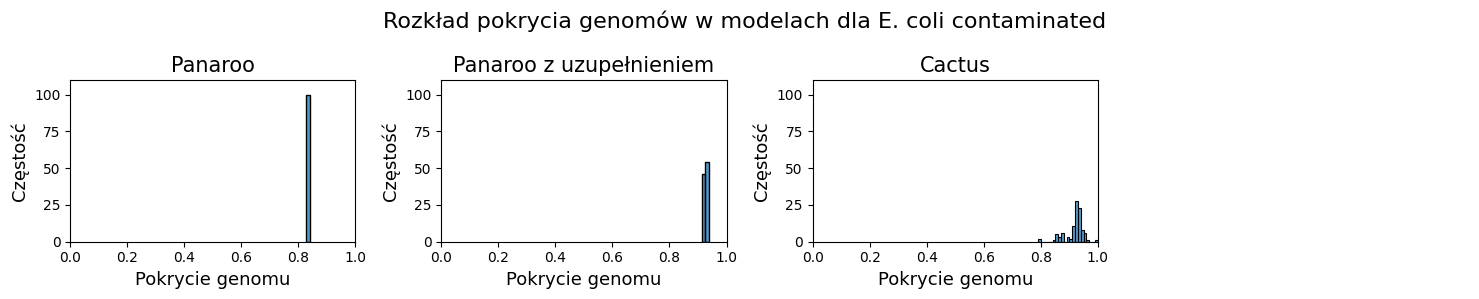

In [126]:
dataset = "E. coli contaminated"
model_name_mapping = {"panaroo" : "Panaroo","panaroo_compl" : "Panaroo z uzupełnieniem","cactus": "Cactus"}
hists_dir = "/home/pampuch/studia/magisterka/final_summaries/scaf_cover/hists/"
fig, axes = plt.subplots(1,4,figsize=(15, 3))
# fig.s
for k in range(3):
    model = model_names[k]
    print(model)
    i = k % 2
    j = k % 3
    # sns.histplot(cvg_dict[dataset][model], ax=axes[k], bins=50, binwidth = 530000*0.01)
    # print(len(cvg_dict[dataset][model]))
    # print(cvg_dict[dataset][model])
    sns.histplot(all_cvg_dict[dataset][model], ax=axes[k], binwidth=0.01)
    axes[k].set_title(model_name_mapping[model], fontsize=15)
    axes[k].set_xlabel("Pokrycie genomu", fontsize=13)
    axes[k].set_ylabel("Częstość", fontsize=13)
    axes[k].set(xlim=(0,1))
    axes[k].set(ylim=(0,110))
fig.suptitle(f"Rozkład pokrycia genomów w modelach dla {dataset}", fontsize=16)

# plt.show()
fig.tight_layout()

axes[3].axis("off")
dataset_name = dataset.replace(" ","_")
plt.savefig(f"{hists_dir}/{dataset_name}_genomes_csv.png")
plt.savefig(f"{hists_dir}/{dataset_name}_genomes_csv.svg")

In [ ]:
# dataset = "E. coli contaminated"
model_name_mapping = {"panaroo" : "Panaroo","panaroo_compl" : "Panaroo z uzupełnieniem","cactus": "Cactus"}
hists_dir = "/home/pampuch/studia/magisterka/final_summaries/scaf_cover/hists/"
fig, axes = plt.subplots(1,3,figsize=(15, 5))
# fig.s
for k in range(3):
    model = model_names[k]
    print(model)
    i = k % 2
    j = k % 3
    # sns.histplot(cvg_dict[dataset][model], ax=axes[k], bins=50, binwidth = 530000*0.01)
    # print(len(cvg_dict[dataset][model]))
    # print(cvg_dict[dataset][model])
    sns.histplot(cvg_dict[dataset][model], ax=axes[k], binwidth=0.01)
    axes[k].set_title(model_name_mapping[model], fontsize=15)
    axes[k].set_xlabel("Pokrycie genomu", fontsize=13)
    axes[k].set_ylabel("Częstość", fontsize=13)
    axes[k].set(xlim=(0,1))
    axes[k].set(ylim=(0,110))
fig.suptitle(f"Rozkład pokrycia genomów w modelach dla {dataset}", fontsize=16)

# plt.show()
fig.tight_layout()

# axes[2, 1].axis("off")
dataset_name = dataset.replace(" ","_")
plt.savefig(f"{hists_dir}/{dataset_name}_genomes_csv.png")
plt.savefig(f"{hists_dir}/{dataset_name}_genomes_csv.svg")